# Data Preparation

In [70]:
import pandas as pd

In [71]:
url = "https://raw.githubusercontent.com/mzhafranaf/Final-Project-Orbit/main/darjeeling.csv"
dataset = pd.read_csv(url)

In [72]:
dataset.head()

,month,season,Location,sex,Subject Code,TSV,TP,air_ts,air_tp,RH_ts,...,PMV,PPD,TnG_R_0.5,Tmr,Top,Tout,Trm,TnG_R_0.25,TnG_R_0.33,Unnamed: 32
0,1.0,1.0,S0135,1.0,FSL1,-1.0,-1,0,0,-1.0,...,0.768705,16.575062,26.948807,25.797614,24.948807,18.5,19.238792,28.948807,27.979110,0.0
1,1.0,1.0,S0135,1.0,FSL2,-1.0,-1,-1,0,1.0,...,0.236143,6.148326,26.860770,25.521541,24.860770,18.5,19.238792,28.860770,27.891073,0.0
2,1.0,1.0,S0135,1.0,FSL3,-1.0,-1,-1,0,1.0,...,0.246064,6.246280,26.948807,25.797614,24.948807,18.5,19.238792,28.948807,27.979110,0.0
3,1.0,1.0,S0135,1.0,FSL4,-1.0,-1,-1,0,1.0,...,0.299259,6.838386,26.843366,25.786732,24.843366,18.5,19.238792,28.843366,27.873669,0.0
4,1.0,1.0,S0135,1.0,FSL5,0.0,0,0,0,0.0,...,-0.444504,9.015203,24.755364,25.510728,24.755364,18.5,19.238792,24.755364,24.755364,0.0


In [73]:
dataset.shape

(3008, 33)

In [74]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         2608 non-null   float64
 1   season        2608 non-null   float64
 2   Location      2608 non-null   object 
 3   sex           2608 non-null   float64
 4   Subject Code  2608 non-null   object 
 5   TSV           2608 non-null   float64
 6   TP            2608 non-null   object 
 7   air_ts        2608 non-null   object 
 8   air_tp        2608 non-null   object 
 9   RH_ts         2608 non-null   float64
 10  RH_tp         2608 non-null   float64
 11  comfort       2608 non-null   object 
 12  prod          2608 non-null   object 
 13  TA            2608 non-null   object 
 14  clo           2608 non-null   float64
 15  Uphols        2608 non-null   object 
 16  clo_tot       2608 non-null   float64
 17  met           2608 non-null   float64
 18  sh_sw         2608 non-null 

In [75]:
dataset.isnull().sum()

month            400
season           400
Location         400
sex              400
Subject Code     400
TSV              400
TP               400
air_ts           400
air_tp           400
RH_ts            400
RH_tp            400
comfort          400
prod             400
TA               400
clo              400
Uphols           400
clo_tot          400
met              400
sh_sw            400
Ti               400
Tg               400
Va               400
RH               400
PMV              400
PPD              400
TnG_R_0.5        400
Tmr              400
Top              400
Tout             400
Trm              400
TnG_R_0.25       400
TnG_R_0.33       400
Unnamed: 32     2438
dtype: int64

In [112]:
data = dataset[['Ti','RH', 'Tmr', 'Va', 'met', 'clo', 'TP']]
data

,Ti,RH,Tmr,Va,met,clo,TP
0,24.1,49.1,25.797614,0.1,1.25,0.98,-1
1,24.2,49.7,25.521541,0.1,1.00,0.86,-1
2,24.1,49.7,25.797614,0.1,1.00,0.85,-1
3,23.9,46.3,25.786732,0.1,1.00,0.93,-1
4,24.0,46.5,25.510728,0.1,1.10,0.40,0
...,...,...,...,...,...,...,...
3003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3006,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
data = data.dropna()
data

,Ti,RH,Tmr,Va,met,clo,TP
0,24.1,49.1,25.797614,0.1,1.25,0.980,-1
1,24.2,49.7,25.521541,0.1,1.00,0.860,-1
2,24.1,49.7,25.797614,0.1,1.00,0.850,-1
3,23.9,46.3,25.786732,0.1,1.00,0.930,-1
4,24.0,46.5,25.510728,0.1,1.10,0.400,0
...,...,...,...,...,...,...,...
2603,12.4,55.6,8.930533,0.1,1.10,0.987,-1
2604,13.8,55.5,14.198998,0.1,1.10,0.830,-1
2605,14.2,53.8,12.796541,0.1,1.10,1.150,0
2606,14.2,55.2,12.190274,0.1,1.10,0.920,-1


In [114]:
data.TP.unique()

array(['-1', '0', '1', '-2', '2', ' '], dtype=object)

In [115]:
data = data.drop(data.index[data['TP']==' '])
data

,Ti,RH,Tmr,Va,met,clo,TP
0,24.1,49.1,25.797614,0.1,1.25,0.980,-1
1,24.2,49.7,25.521541,0.1,1.00,0.860,-1
2,24.1,49.7,25.797614,0.1,1.00,0.850,-1
3,23.9,46.3,25.786732,0.1,1.00,0.930,-1
4,24.0,46.5,25.510728,0.1,1.10,0.400,0
...,...,...,...,...,...,...,...
2603,12.4,55.6,8.930533,0.1,1.10,0.987,-1
2604,13.8,55.5,14.198998,0.1,1.10,0.830,-1
2605,14.2,53.8,12.796541,0.1,1.10,1.150,0
2606,14.2,55.2,12.190274,0.1,1.10,0.920,-1


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2607 entries, 0 to 2607
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ti      2607 non-null   float64
 1   RH      2607 non-null   float64
 2   Tmr     2607 non-null   float64
 3   Va      2607 non-null   float64
 4   met     2607 non-null   float64
 5   clo     2607 non-null   float64
 6   TP      2607 non-null   object 
dtypes: float64(6), object(1)
memory usage: 162.9+ KB


In [117]:
data.describe()

,Ti,RH,Tmr,Va,met,clo
count,2607.000000,2607.000000,2607.000000,2607.000000,2607.000000,2607.000000
mean,20.627476,67.064440,21.395972,0.177342,1.115428,0.853515
std,4.918662,11.837453,5.983452,0.270712,0.121270,0.339383
min,8.200000,30.500000,8.119420,0.000000,0.700000,0.070000
25%,16.600000,60.400000,16.494298,0.100000,1.100000,0.580000
50%,20.100000,69.600000,20.991648,0.100000,1.100000,0.790000
75%,23.700000,75.300000,24.632333,0.100000,1.100000,1.060000
max,32.500000,94.000000,47.004464,2.200000,3.000000,2.300000


In [118]:
data['TP'].value_counts()

0     1174
-1     977
1      322
-2      89
2       45
Name: TP, dtype: int64

In [119]:
comfortLevel = {'-2':'cool',
                '-1':'cool',
                '0':'comfort',
                '1':'warm',
                '2':'warm'}

data['comfortLevel'] = data['TP'].map(comfortLevel)
data.head()

,Ti,RH,Tmr,Va,met,clo,TP,comfortLevel
0,24.1,49.1,25.797614,0.1,1.25,0.98,-1,cool
1,24.2,49.7,25.521541,0.1,1.00,0.86,-1,cool
2,24.1,49.7,25.797614,0.1,1.00,0.85,-1,cool
3,23.9,46.3,25.786732,0.1,1.00,0.93,-1,cool
4,24.0,46.5,25.510728,0.1,1.10,0.40,0,comfort


In [120]:
data['comfortLevel'].value_counts()

comfort    1174
cool       1066
warm        367
Name: comfortLevel, dtype: int64

# EDA

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='comfortLevel', ylabel='count'>

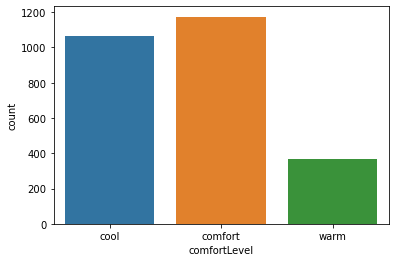

In [103]:
sns.countplot(x='comfortLevel', data=data)

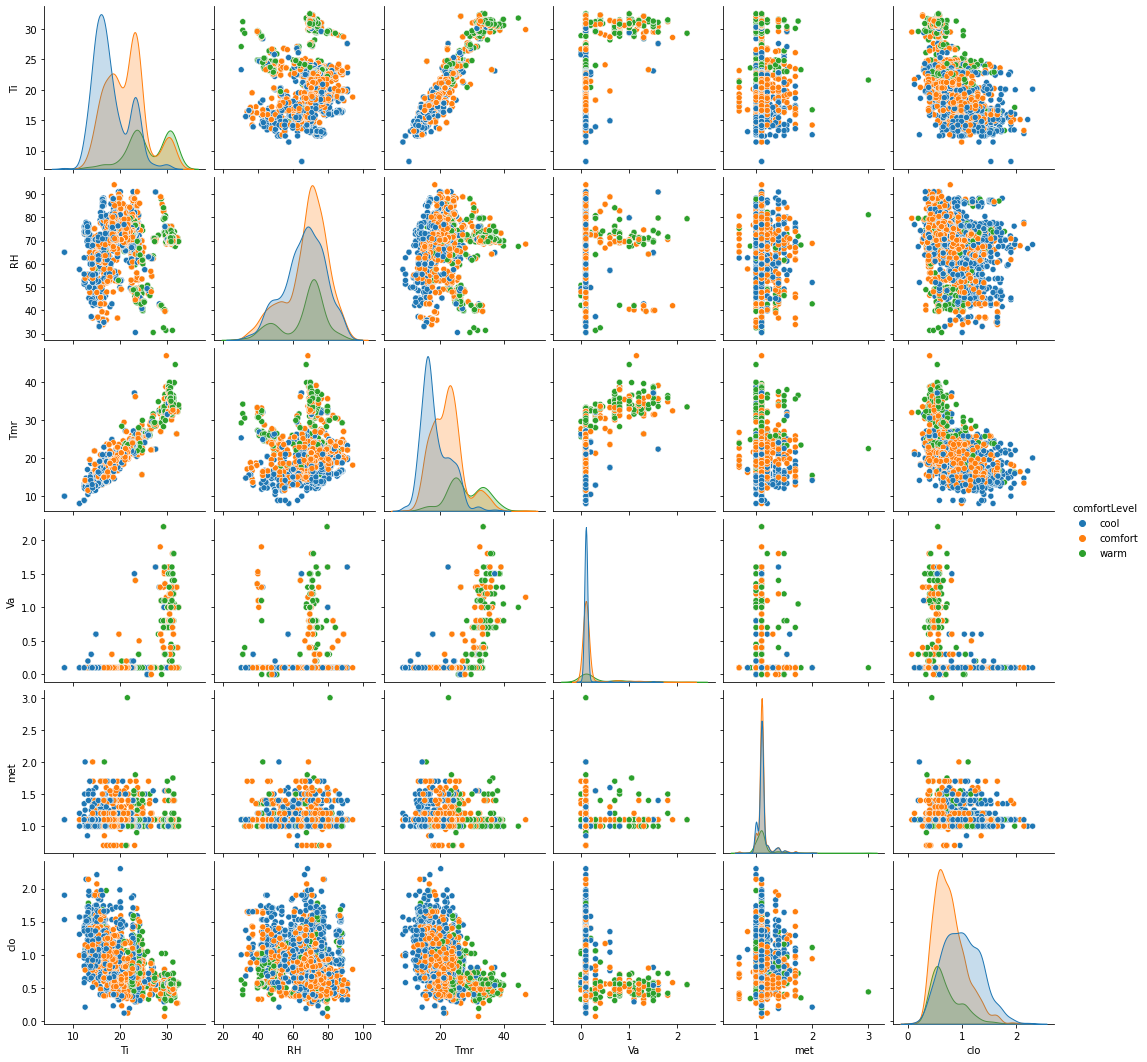

In [104]:
sns.pairplot(data=data, hue='comfortLevel')

<AxesSubplot:>

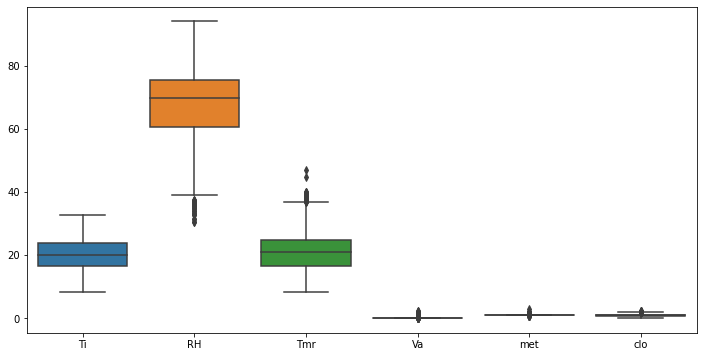

In [137]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data)

<AxesSubplot:>

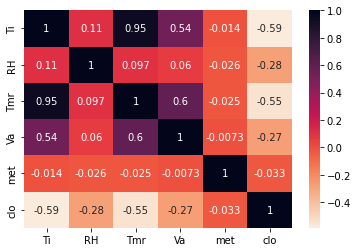

In [105]:
sns.heatmap(data.corr(),annot=True,cmap='rocket_r')

# Classification 

In [264]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [199]:
# d1 = data[data["comfortLevel"]=="cool"].sample(500, random_state=1)
# d2 = data[data["comfortLevel"]=="comfort"].sample(500, random_state=1)
# d3 = data[data["comfortLevel"]=="warm"]
# data = pd.concat([d1,d2,d3])
# data.head()

###### Scaling Data

In [200]:
X = data.iloc[:,:-2]
y = data.iloc[:,-1]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

###### Splitting Data

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [268]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1093, 6) (274, 6)
(1093,) (274,)


###### Models Accuracy

In [271]:
modelsAccuracy = pd.DataFrame(columns=['Model', 'Accuracy'])

models = [('LogReg', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC()),
          ('Random Forest', RandomForestClassifier()),
          ('Decision Tree', DecisionTreeClassifier()),
          ('Naive Bayes', GaussianNB())]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    
#     cm = confusion_matrix(y_test, y_pred)
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#     disp.plot()
#     plt.title(name)
    
    modelsAccuracy = modelsAccuracy.append({'Model': name, 'Accuracy': accuracy}, ignore_index=True)
    
modelsAccuracy

,Model,Accuracy
0,LogReg,0.591241
1,KNN,0.565693
2,SVM,0.580292
3,Random Forest,0.613139
4,Decision Tree,0.543796
5,Naive Bayes,0.547445


# Cross Validation

In [261]:
from sklearn.model_selection import cross_val_score

In [272]:
scoreCV = pd.DataFrame(columns=['Model', 'Cross Val Score'])

for name, model in models:
    score = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    print(f'{name} : {score}')
    
    scoreCV = scoreCV.append({'Model':name, 'Cross Val Score':score.mean()}, ignore_index=True)

scoreCV

LogReg : [0.58394161 0.6350365  0.70072993 0.7080292  0.69343066 0.67153285
 0.40145985 0.44852941 0.44852941 0.38970588]
KNN : [0.51094891 0.55474453 0.66423358 0.59124088 0.64963504 0.56934307
 0.42335766 0.44117647 0.51470588 0.41911765]
SVM : [0.53284672 0.65693431 0.7080292  0.72262774 0.70072993 0.65693431
 0.40875912 0.45588235 0.41176471 0.41911765]
Random Forest : [0.49635036 0.5620438  0.61313869 0.65693431 0.59854015 0.47445255
 0.39416058 0.47794118 0.47058824 0.48529412]
Decision Tree : [0.48175182 0.45255474 0.51824818 0.45985401 0.44525547 0.45985401
 0.40875912 0.41176471 0.44117647 0.41911765]
Naive Bayes : [0.42335766 0.53284672 0.69343066 0.65693431 0.58394161 0.68613139
 0.43065693 0.45588235 0.41176471 0.40441176]


,Model,Cross Val Score
0,LogReg,0.568093
1,KNN,0.533850
2,SVM,0.567363
3,Random Forest,0.522944
4,Decision Tree,0.449834
5,Naive Bayes,0.527936
